# SARS-CoV-2 Variants in Mexico

In [1]:
import pandas as pd
import ipywidgets as widgets
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Read SARS-CoV-2 variant data for Mexico

In [3]:
url = 'https://raw.githubusercontent.com/sbl-sdsc/sars-cov-2-variants/main/data/variants.parquet'

In [4]:
df = pd.read_parquet(url, columns=['name','lineage','location','collectionDate'])

In [5]:
print(df.shape)
df.head()

(2764634, 4)


,name,lineage,location,collectionDate
0,BetaCoV/Wuhan/HBCDC-HB-01/2019,B.1.36.10,China / Hubei,2019-12-30
1,hCoV-19/Thailand/74/2020,B,Thailand/ Nonthaburi Province,2020-01-13
2,hCoV-19/Thailand/61/2020,B,Thailand/ Nonthaburi Province,2020-01-08
3,BetaCoV/Wuhan/IVDC-HB-04/2020,B,China / Hubei / Wuhan,2020-01-01
4,BetaCoV/Wuhan/IVDC-HB-01/2019,B,China / Hubei / Wuhan,2019-12-30


Split location into components

In [6]:
df[['loc0', 'loc1', 'loc2', 'loc3']] = df['location'].str.split('/', n=3, expand=True)
# strip white space
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.fillna('', inplace=True)

In [7]:
dfm = df.query('loc0 == "Mexico"').copy()

In [8]:
print(dfm.shape)
dfm.head()

(18563, 8)


,name,lineage,location,collectionDate,loc0,loc1,loc2,loc3
241,hCoV-19/Mexico/CDMX-InDRE_01/2020,B.1.1,Mexico / Mexico City,2020-02-27,Mexico,Mexico City,,
6761,hCoV-19/Mexico/CDMX-INER_01/2020,B.1.234,Mexico / Mexico City,2020-03-12,Mexico,Mexico City,,
6764,hCoV-19/Mexico/CDMX-INER_02/2020,B.1,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7028,hCoV-19/Mexico/CDMX-INER_03/2020,B,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7029,hCoV-19/Mexico/CDMX-INER_04/2020,B.1.201,Mexico / Mexico City,2020-03-15,Mexico,Mexico City,,


In [9]:
dfm['loc1'].replace({'BC': "Baja California"}, inplace=True)
dfm['loc2'].replace({'BajaCalifornia': "Baja California"}, inplace=True)

In [10]:
dfm.head()

,name,lineage,location,collectionDate,loc0,loc1,loc2,loc3
241,hCoV-19/Mexico/CDMX-InDRE_01/2020,B.1.1,Mexico / Mexico City,2020-02-27,Mexico,Mexico City,,
6761,hCoV-19/Mexico/CDMX-INER_01/2020,B.1.234,Mexico / Mexico City,2020-03-12,Mexico,Mexico City,,
6764,hCoV-19/Mexico/CDMX-INER_02/2020,B.1,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7028,hCoV-19/Mexico/CDMX-INER_03/2020,B,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7029,hCoV-19/Mexico/CDMX-INER_04/2020,B.1.201,Mexico / Mexico City,2020-03-15,Mexico,Mexico City,,


In [11]:
dfm.query('collectionDate < "2021-07-31"', inplace=True)

In [12]:
top = 10 # number of top lineages for visualization

In [13]:
top_lineages = dfm.groupby('lineage').size().reset_index(name='count')

In [14]:
top_lineages.head()

,lineage,count
0,,88
1,A,1
2,A.1,8
3,A.2,3
4,A.2.5,41


In [15]:
top_lineages.sort_values(['count'], inplace=True, ascending=False)

In [16]:
top_lineages.head()

,lineage,count
61,B.1.1.519,7690
167,P.1,1742
64,B.1.1.7,1674
153,B.1.617.2,1603
15,B.1,770


In [17]:
top_lineages = top_lineages.head(top)

In [18]:
top_lineages.head(100)

,lineage,count
61,B.1.1.519,7690
167,P.1,1742
64,B.1.1.7,1674
153,B.1.617.2,1603
15,B.1,770
28,B.1.1.222,652
168,P.1.1,465
88,B.1.243,435
16,B.1.1,274
159,B.1.628,266


In [19]:
legend = top_lineages['lineage'].values

In [20]:
legend

array(['B.1.1.519', 'P.1', 'B.1.1.7', 'B.1.617.2', 'B.1', 'B.1.1.222',
       'P.1.1', 'B.1.243', 'B.1.1', 'B.1.628'], dtype=object)

In [21]:
legend = np.append(legend, 'other')
print(f'Top {top} lineages:', legend)

Top 10 lineages: ['B.1.1.519' 'P.1' 'B.1.1.7' 'B.1.617.2' 'B.1' 'B.1.1.222' 'P.1.1'
 'B.1.243' 'B.1.1' 'B.1.628' 'other']


In [22]:
dfm['lineage'] = dfm['lineage'].apply(lambda x: x if x in legend else 'other')

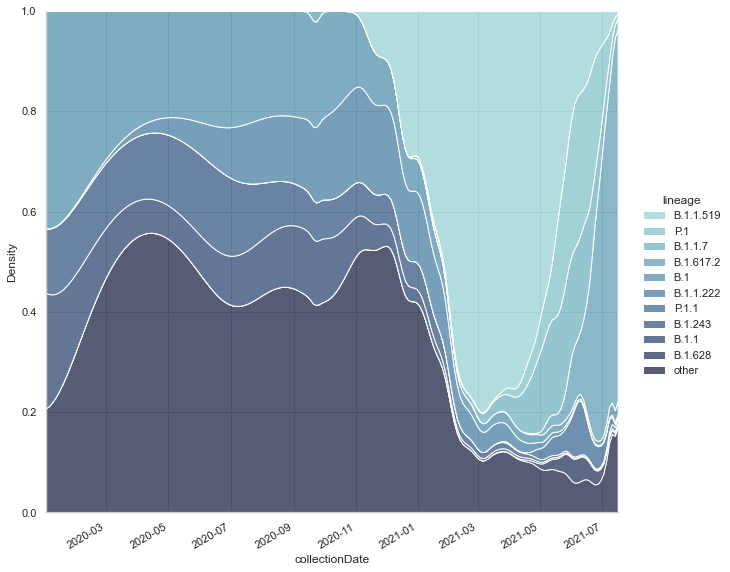

In [23]:
sns.set_theme(style="whitegrid")
sns.displot(dfm, x="collectionDate", hue="lineage", hue_order=legend, kind="kde",
            height=9, multiple="fill", cut=0, palette="ch:rot=-.25,hue=1,light=.75").fig.autofmt_xdate();